In [13]:
import pandas as pd
import numpy as np
import xarray as xr
# import cartopy.crs as ccrs
# import cartopy.feature as cfeat
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
import geopandas as gpd
import rioxarray
import warnings
warnings.filterwarnings('ignore')
import os

In [14]:
def centroids(ds):
    max_precip=ds.max(dim="time",skipna=True)
    min_precip=ds.min(dim="time",skipna=True)
    a = (ds - min_precip+0.0000001)/(max_precip - min_precip+0.0000001)
    y = a.lat.dot(a.fillna(0) , dims=["lon","lat"])/ a.fillna(0).sum(skipna=True , dim=["lat","lon"])
    x = a.lon.dot(a.fillna(0) , dims=["lon","lat"])/ a.fillna(0).sum(skipna=True , dim=["lat","lon"])
    return (x.values,y.values)


In [4]:
ds = xr.open_mfdataset("/mnt/d/UGP/datasets/full_data_daily_v2020_10_2000.nc").sel(lat = slice(5,45) , lon = slice(65,100))
ds = ds.precip.rio.set_crs(4326)
sf = gpd.read_file('/mnt/d/UGP/datasets/hydrosheds_India.shp')

In [5]:
# x,y = centroids(ds)

In [6]:
# def make_figure():
#     fig = plt.figure(figsize=(10, 5))
#     ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
#     plt.ylim(5,45)
#     plt.xlim(65,100)
    
#     # generate a basemap with oceans and coastlines
#     ax.add_feature(cfeat.LAND)
#     ax.add_feature(cfeat.OCEAN)
#     ax.add_feature(cfeat.COASTLINE)
#     return fig, ax

In [7]:
# for i in range(0,len(x),30):
# #     _, ax = make_figure()
# #     plt.figure()
#     sf.boundary.plot(figsize=(10, 5))
#     plt.scatter(x[i],y[i],c='r')
#     plt.title("Day:" + str(i+1))
#     plt.show()

In [8]:
# fig, ax = make_figure()

# frames = len(x)

# def draw(frame):
#     plot = ax.scatter(x[frame],y[frame])
#     ax.set_title("Day:" + str(frame+1))
#     return plot


# def init():
#     return draw(0)


# def animate(frame):
#     return draw(frame)


# ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
# plt.close(fig)

In [9]:
# ani.save('precip.mp4', writer=animation.FFMpegWriter(fps=5))

In [10]:
xs=[]
ys=[]
for index, row in sf.iterrows():
    x1,y1 = centroids(ds.rio.clip(row, sf.crs, drop=False))
    xs.append(x1)
    ys.append(y1)

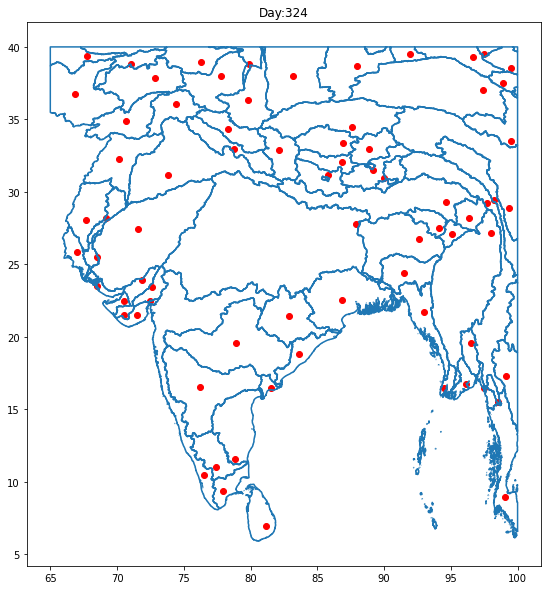

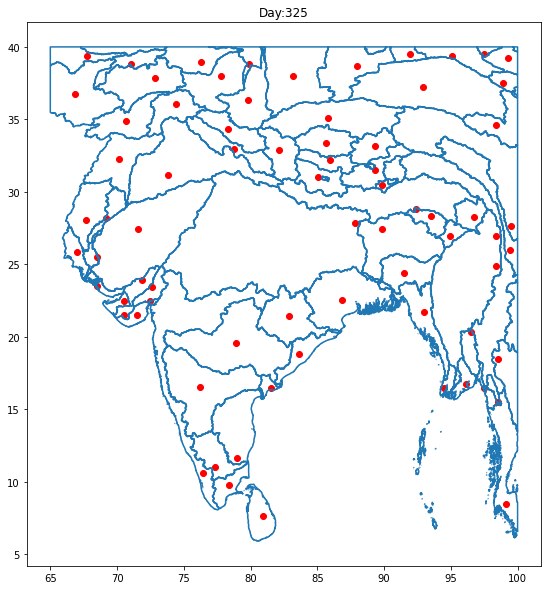

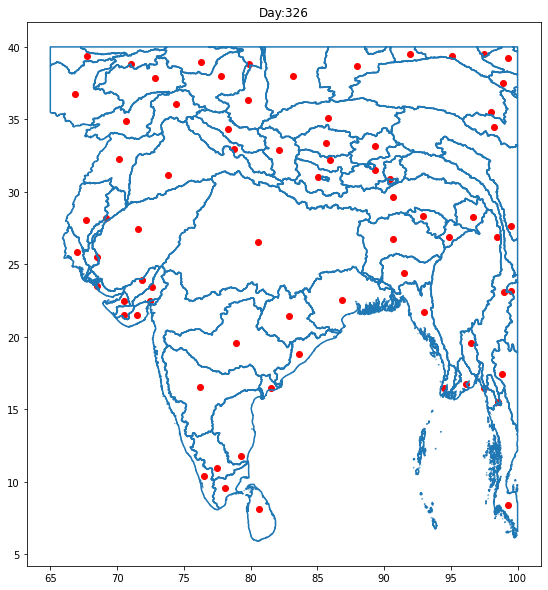

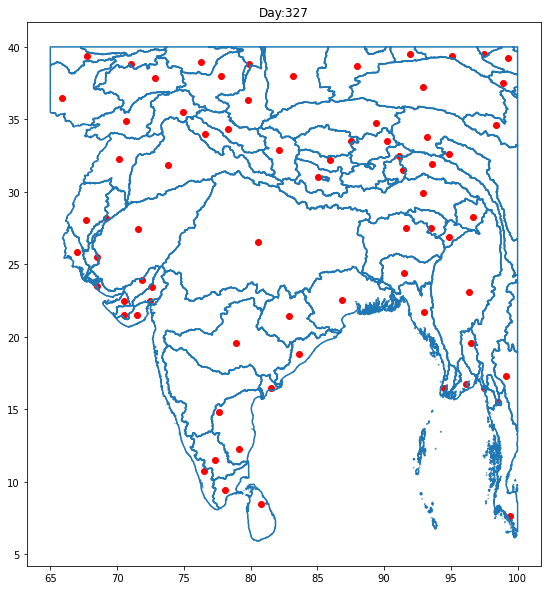

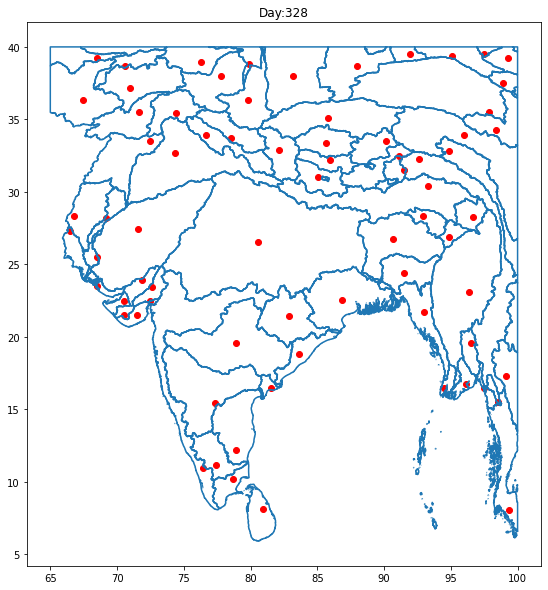

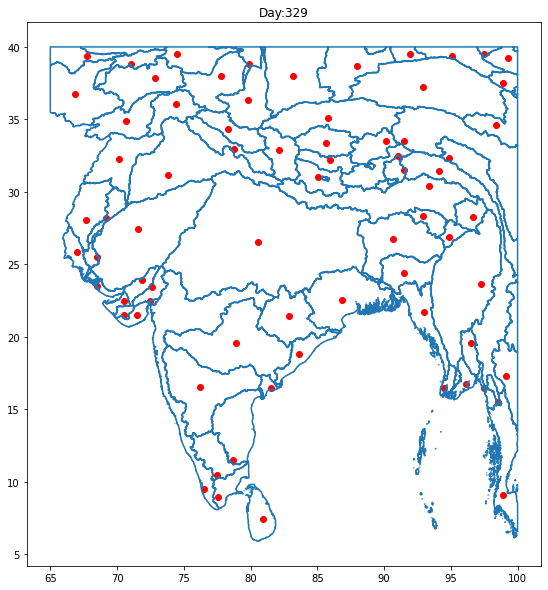

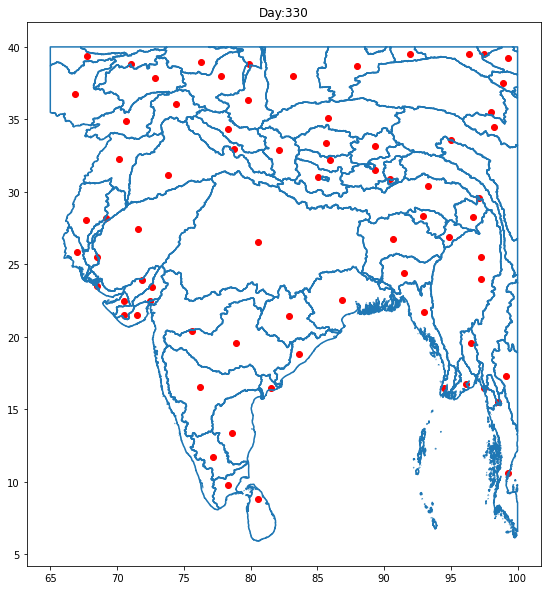

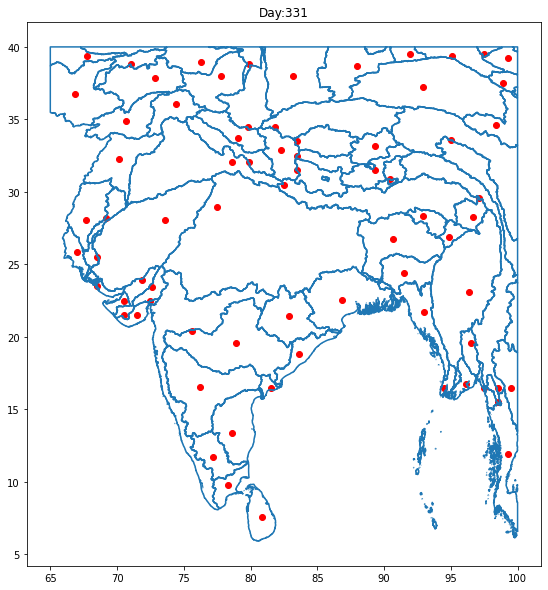

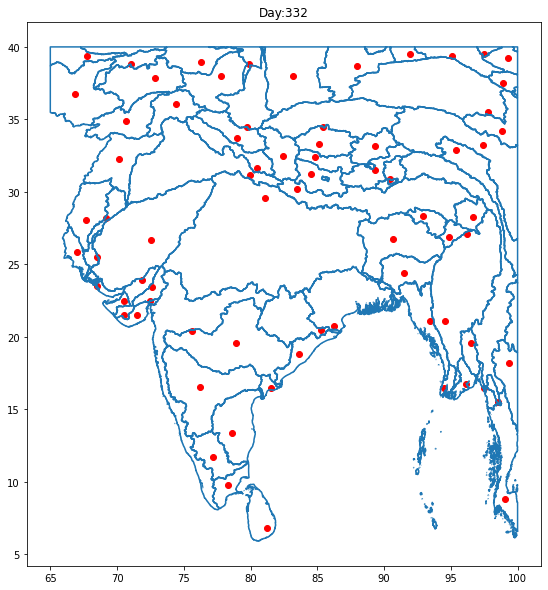

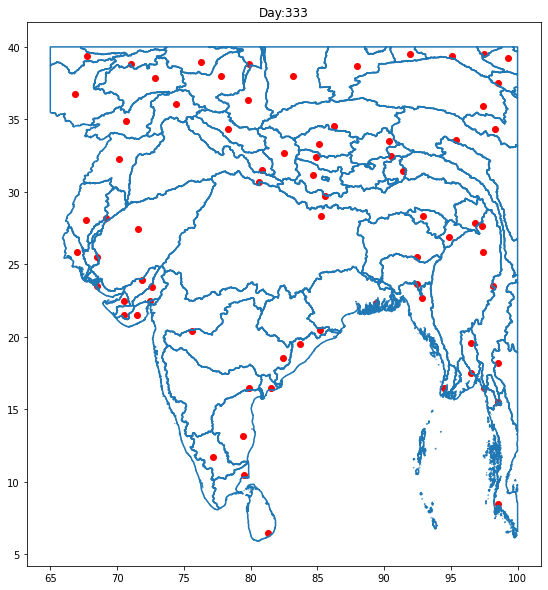

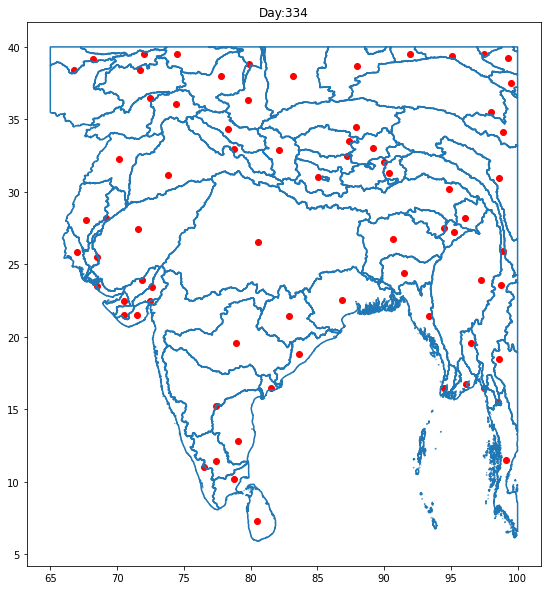

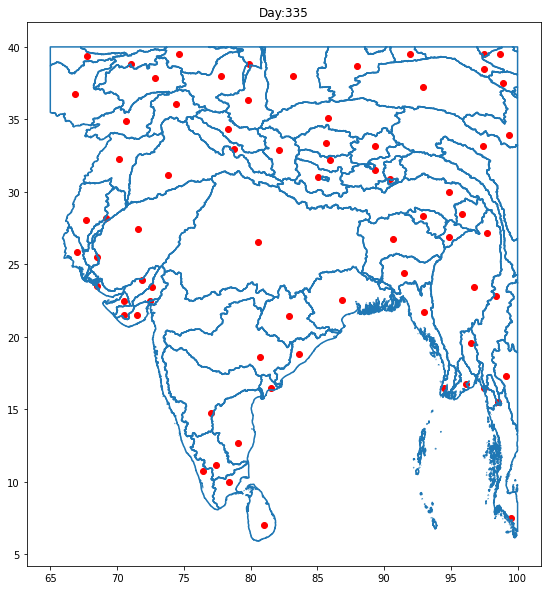

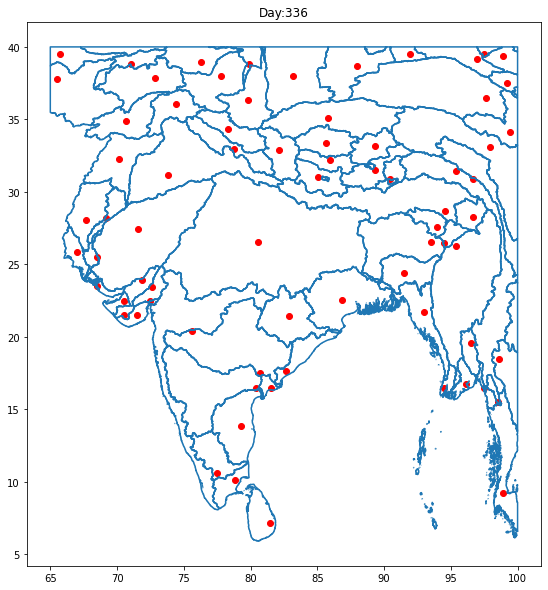

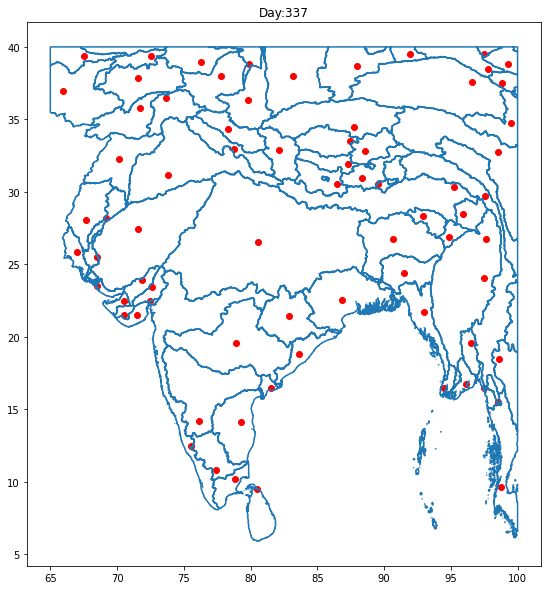

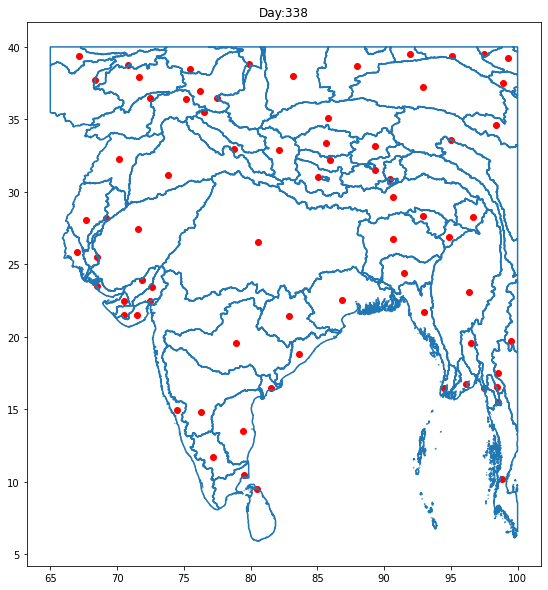

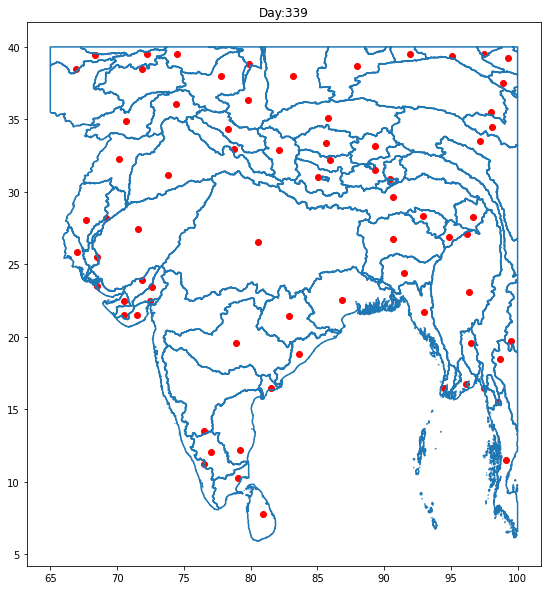

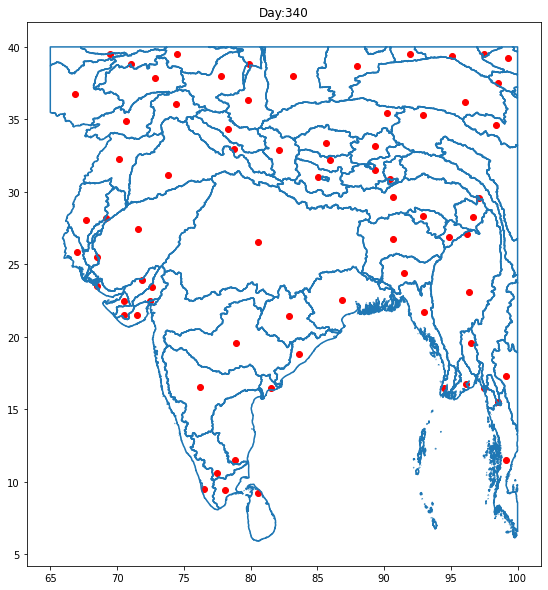

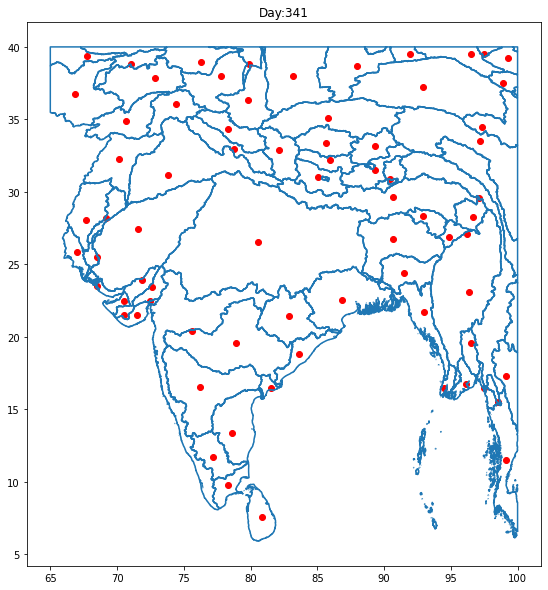

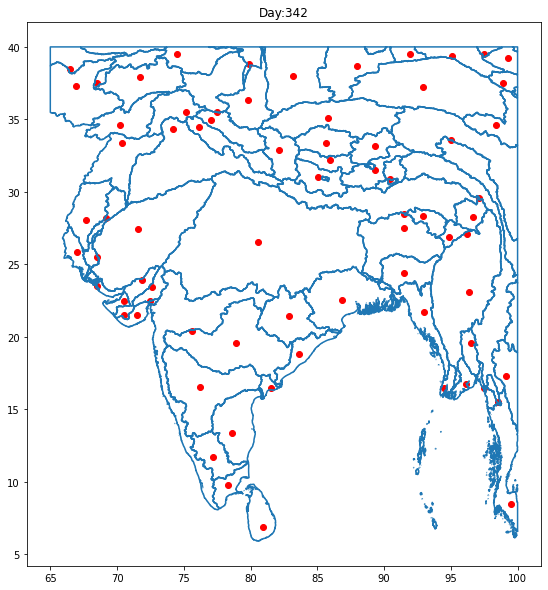

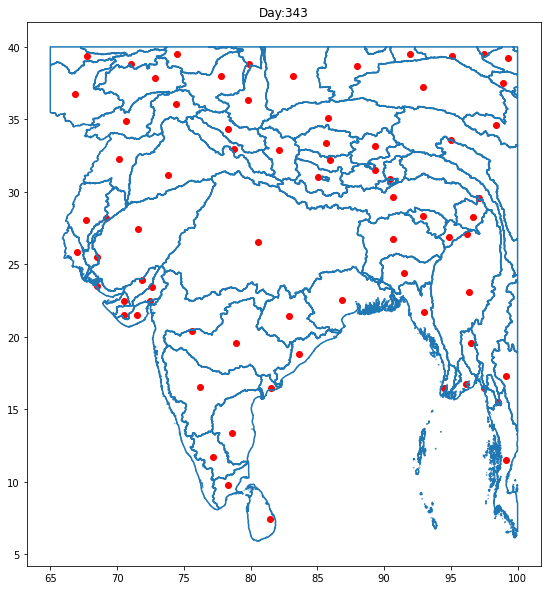

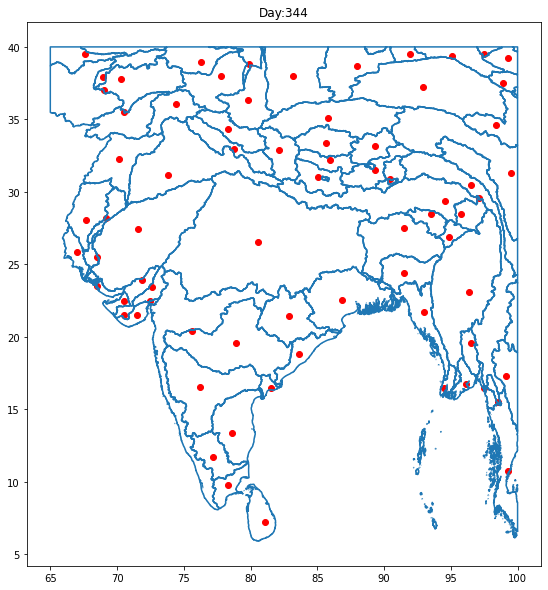

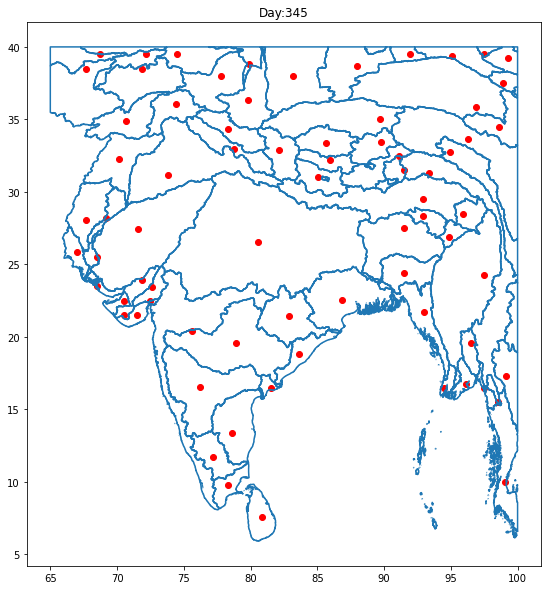

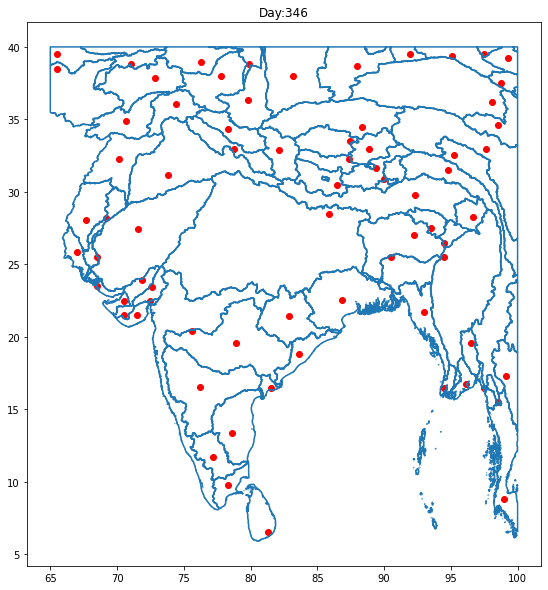

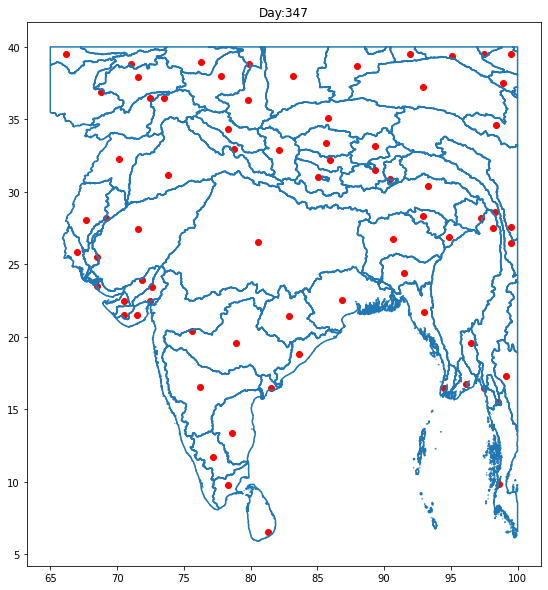

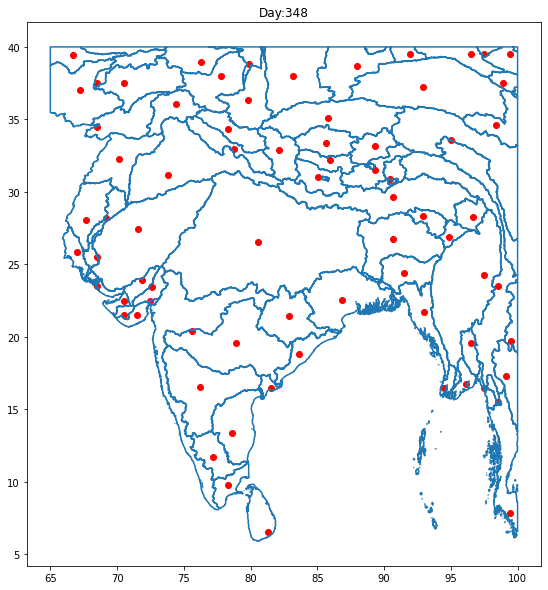

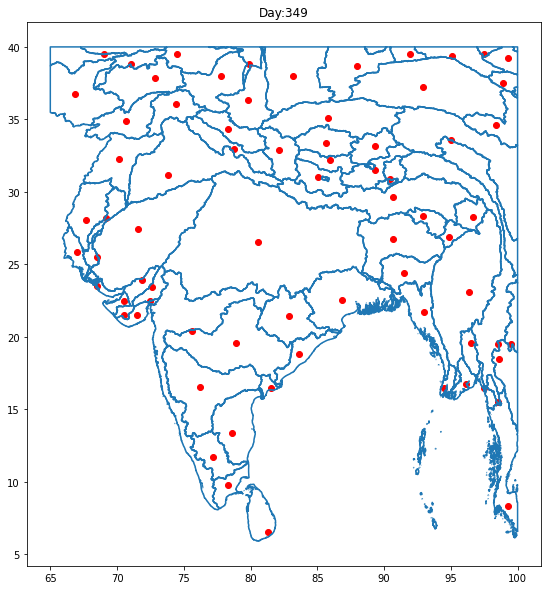

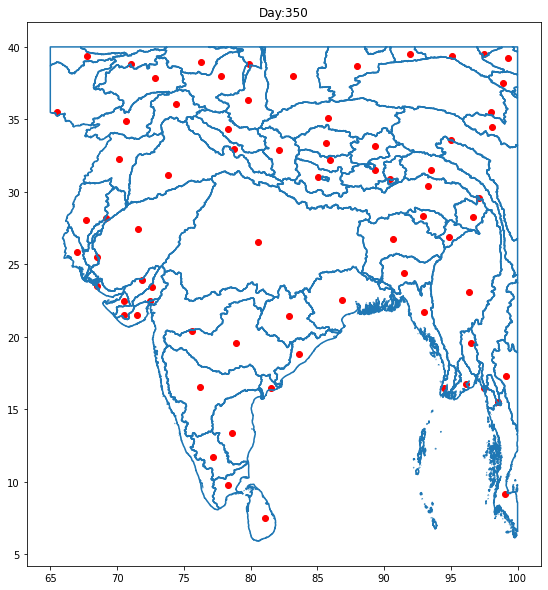

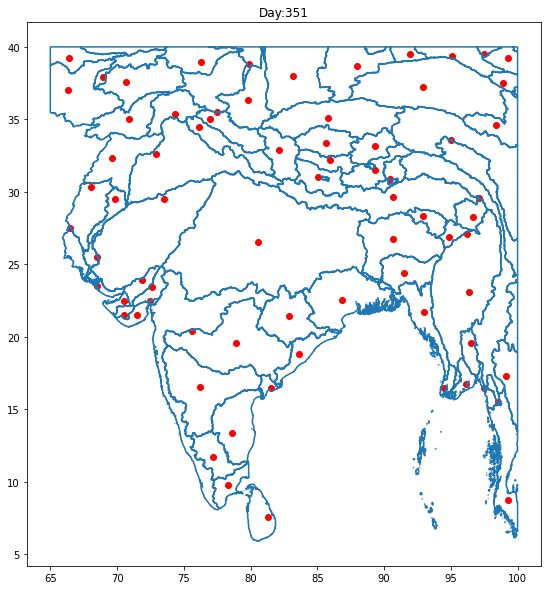

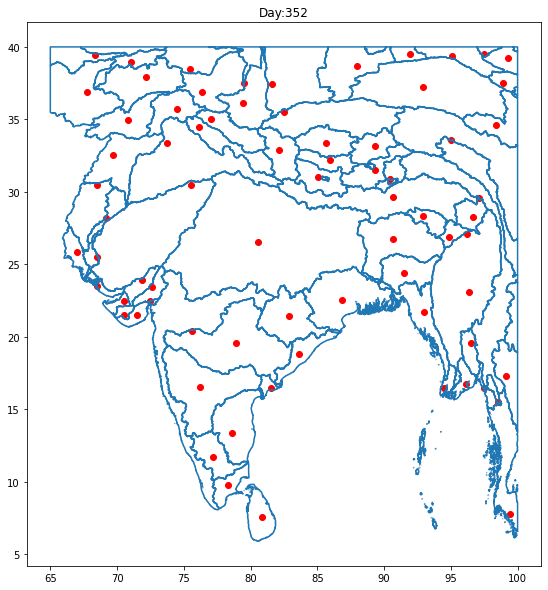

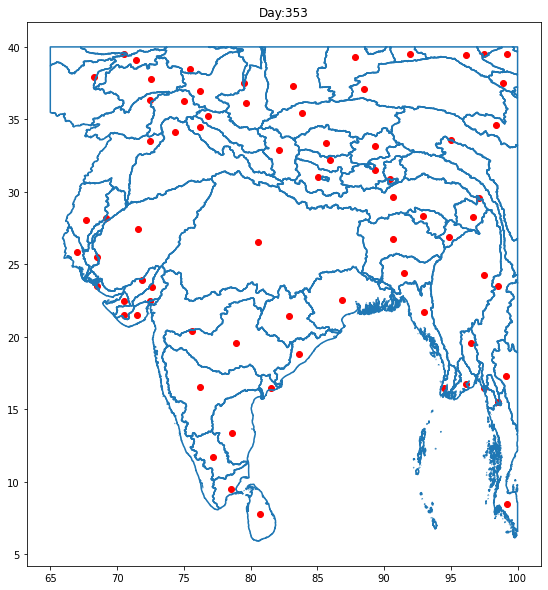

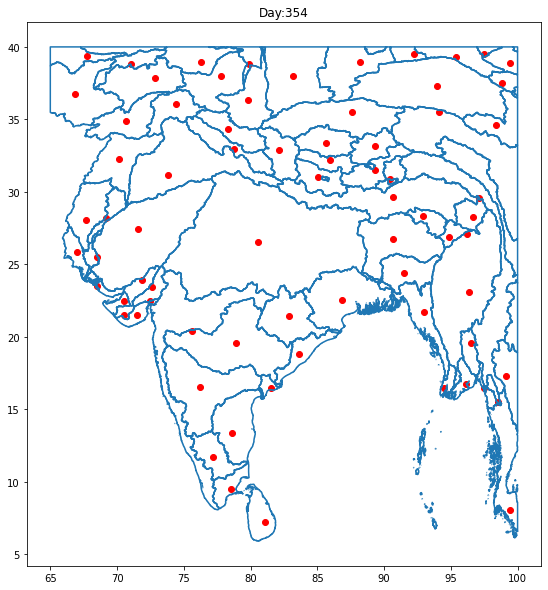

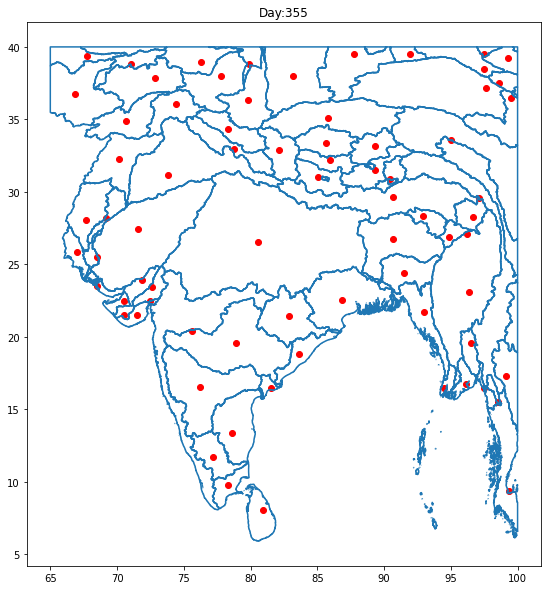

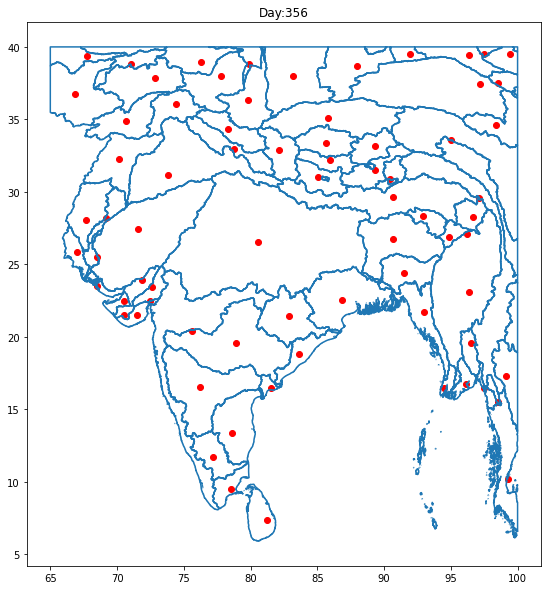

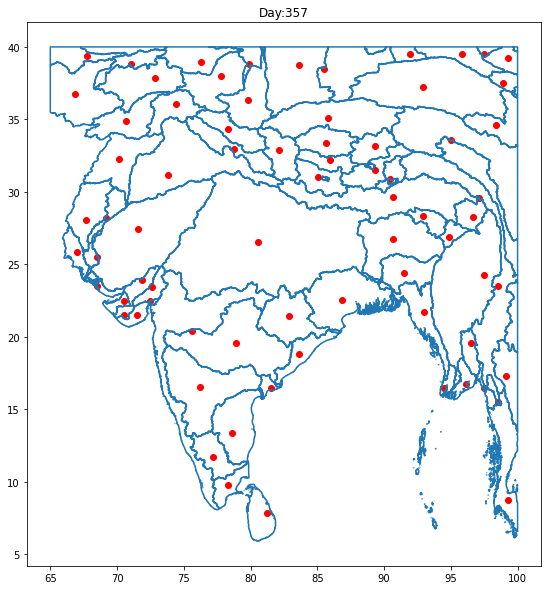

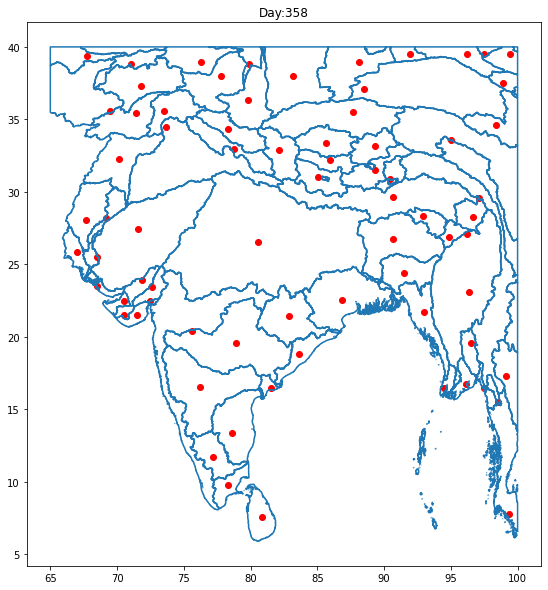

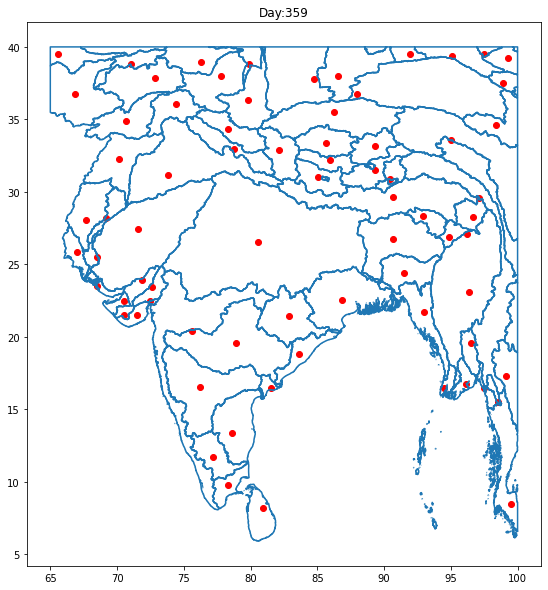

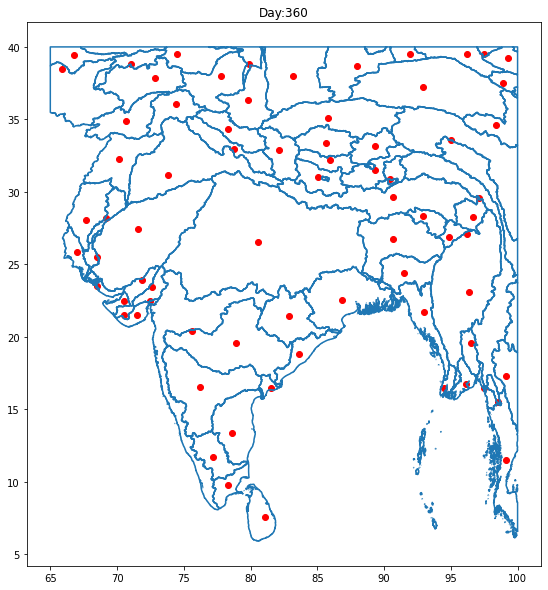

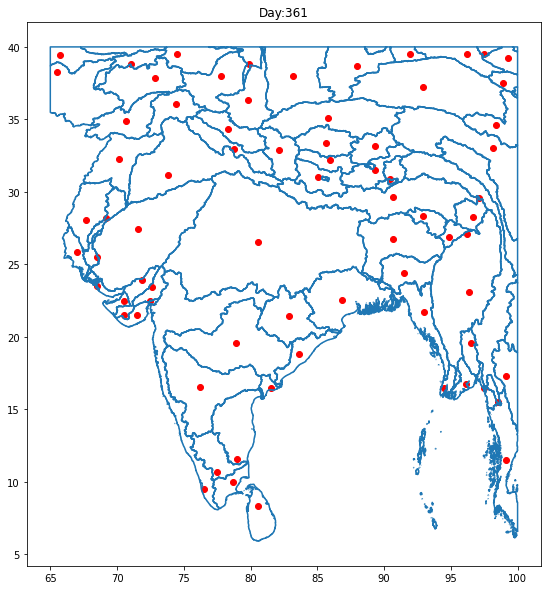

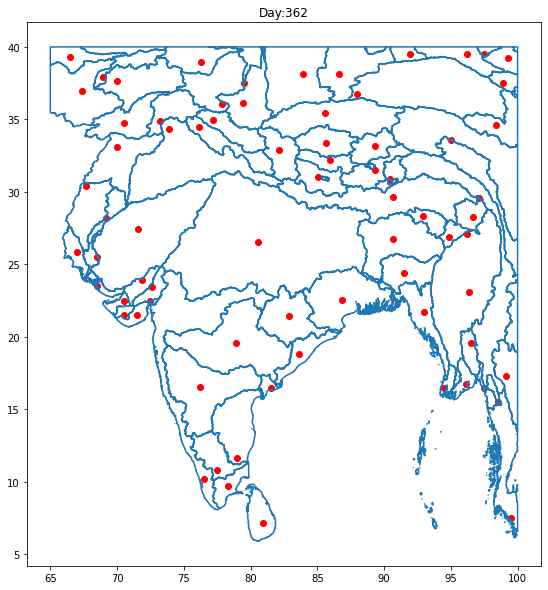

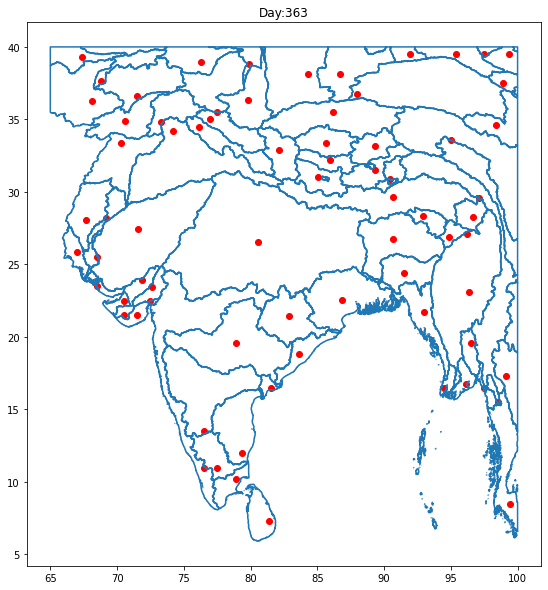

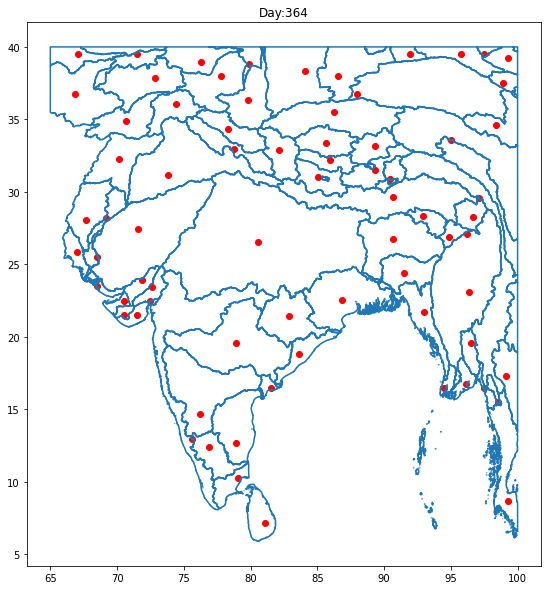

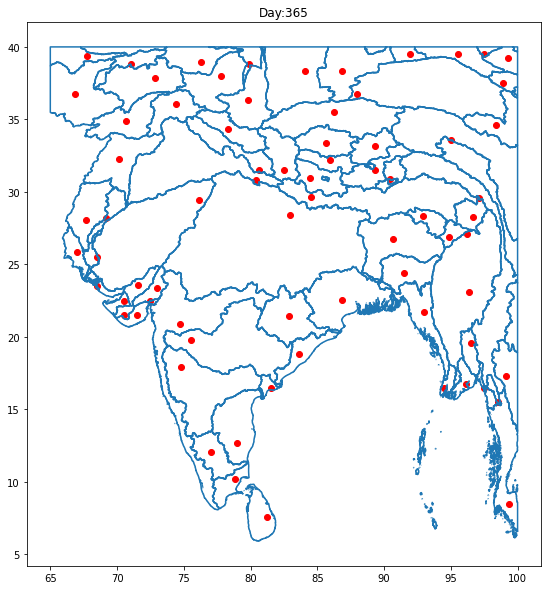

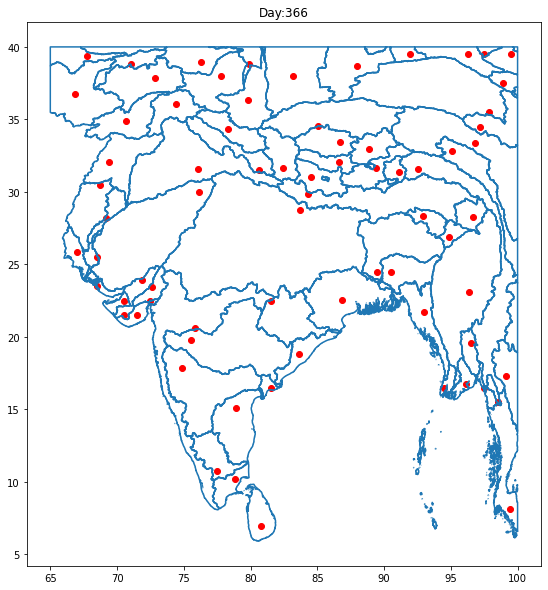

In [15]:
for i in range(0,len(xs[0])):
    sf.boundary.plot(figsize=(20, 10))
    for j in range(len(xs)):
        plt.scatter(xs[j][i],ys[j][i],c='r')
    fig = plt.title("Day:" + str(i+1))
    filepath = os.path.join("/mnt/d/catchment", str(i)+'.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)